#Importing Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
pal = sns.color_palette()
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
import glob
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
from keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout

#Loading the data

In [ ]:
districts_data=pd.read_csv("/content/districts_info.csv")

#Exploratory data analysis

In [ ]:
districts_data.head()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
districts_data.tail()

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN
232,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


Columns/features in data

In [ ]:
districts_data.columns

Index(['district_id', 'state', 'locale', 'pct_black/hispanic',
       'pct_free/reduced', 'county_connections_ratio', 'pp_total_raw'],
      dtype='object')

In [ ]:
print("length of data is : ", len(districts_data))

length of data is :  233


In [ ]:
districts_data.shape

(233, 7)

In [ ]:
districts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   district_id               233 non-null    int64 
 1   state                     176 non-null    object
 2   locale                    176 non-null    object
 3   pct_black/hispanic        176 non-null    object
 4   pct_free/reduced          148 non-null    object
 5   county_connections_ratio  162 non-null    object
 6   pp_total_raw              118 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.9+ KB


In [ ]:
districts_data.dtypes

district_id                  int64
state                       object
locale                      object
pct_black/hispanic          object
pct_free/reduced            object
county_connections_ratio    object
pp_total_raw                object
dtype: object

checking for NULL/MISSING VALUES

In [ ]:
np.sum(districts_data.isnull().any(axis=1))

145

In [ ]:
print("count of the columns in the data is: ",len(districts_data.columns))

count of the columns in the data is:  7


In [ ]:
print("count of the rows in the data is: ",len(districts_data))

count of the rows in the data is:  233


Deleting the duplicate rows

In [ ]:
current =len(districts_data)
print("length of data before deleting  : ", current)



length of data before deleting  :  233


In [ ]:
districts_data.drop_duplicates(inplace=True)

now = len(districts_data)
print("length of data after deleting  : ",now)

length of data after deleting  :  233


In [ ]:
diff = current - now
print("length of data after deleting  : ",diff)

length of data after deleting  :  0


#Data Visualization

**Univariate Analysis**

Distribution of state

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

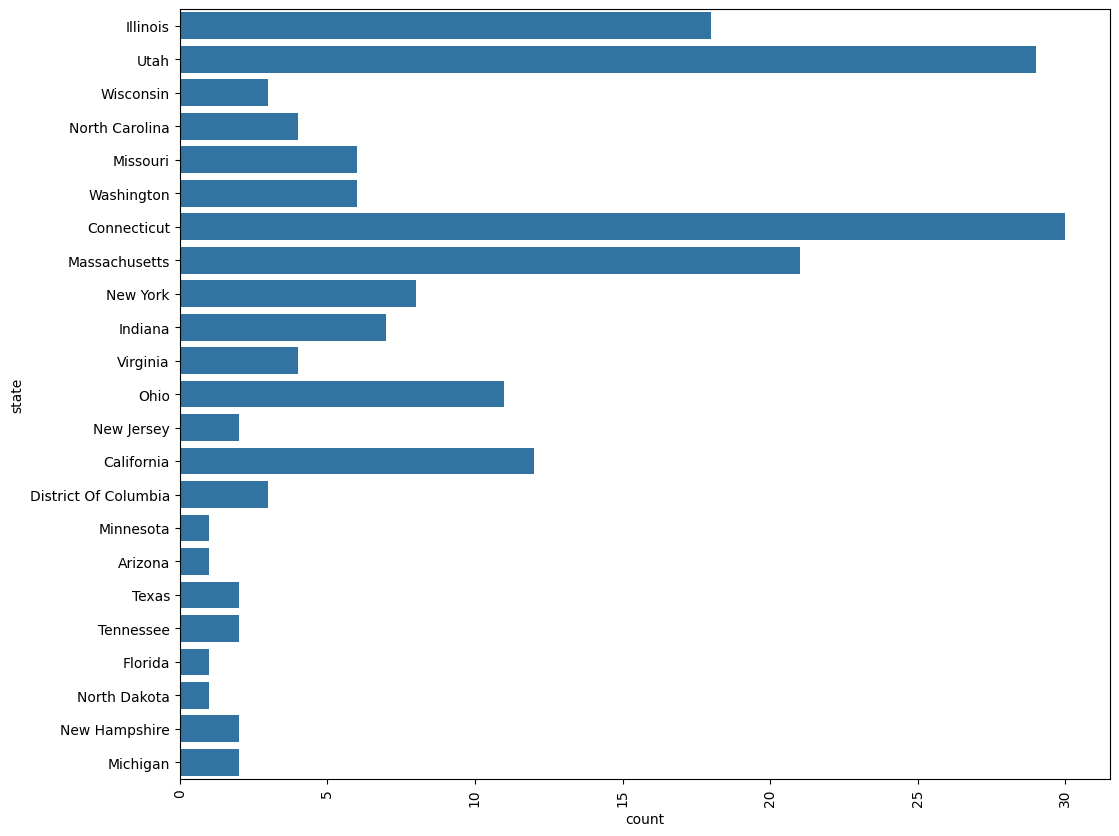

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(districts_data.state)
plt.xticks(rotation=90)

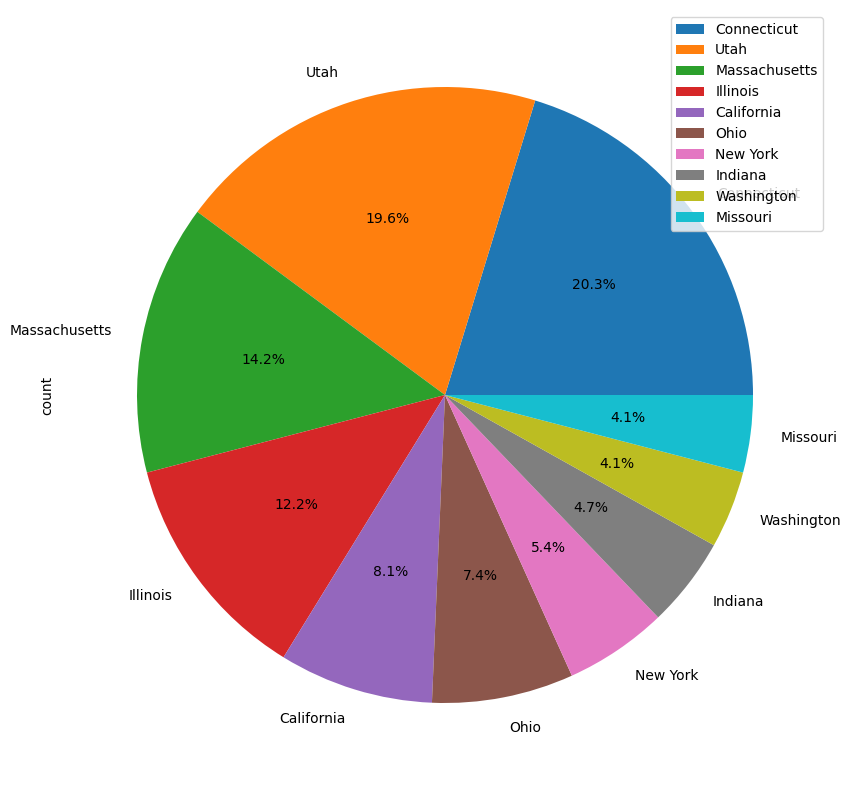

In [ ]:
districts_data["state"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

Distribution of locale

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

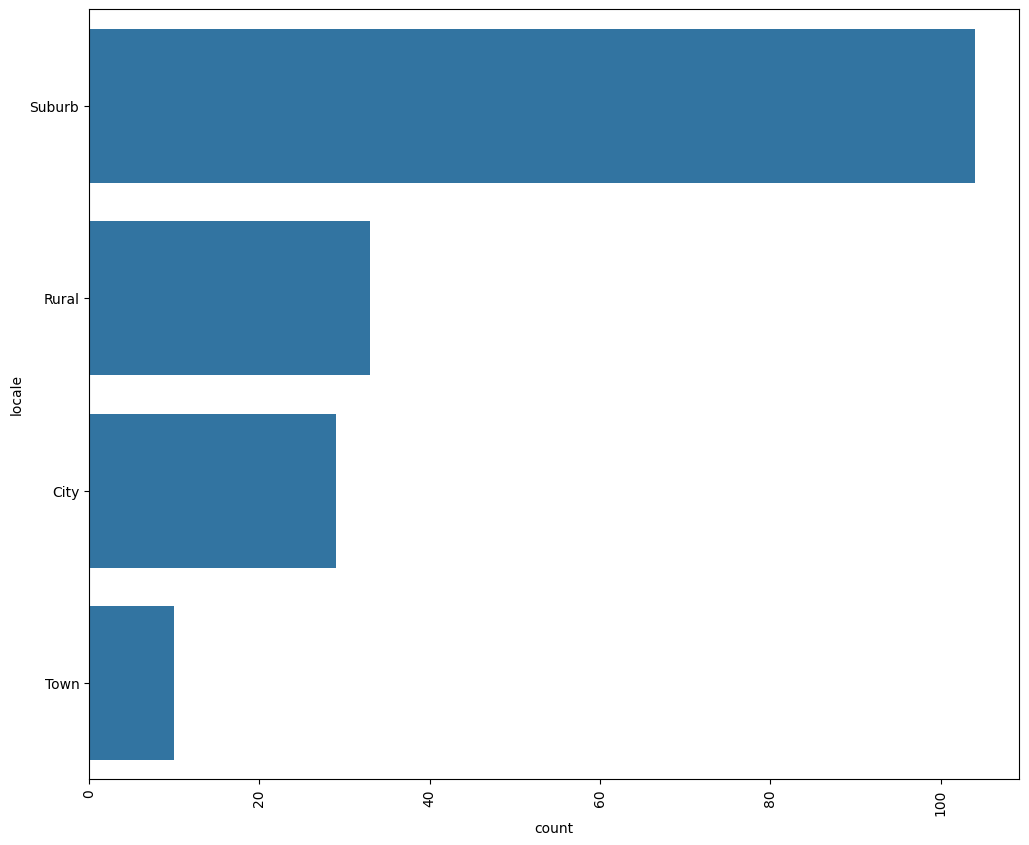

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(districts_data.locale)
plt.xticks(rotation=90)

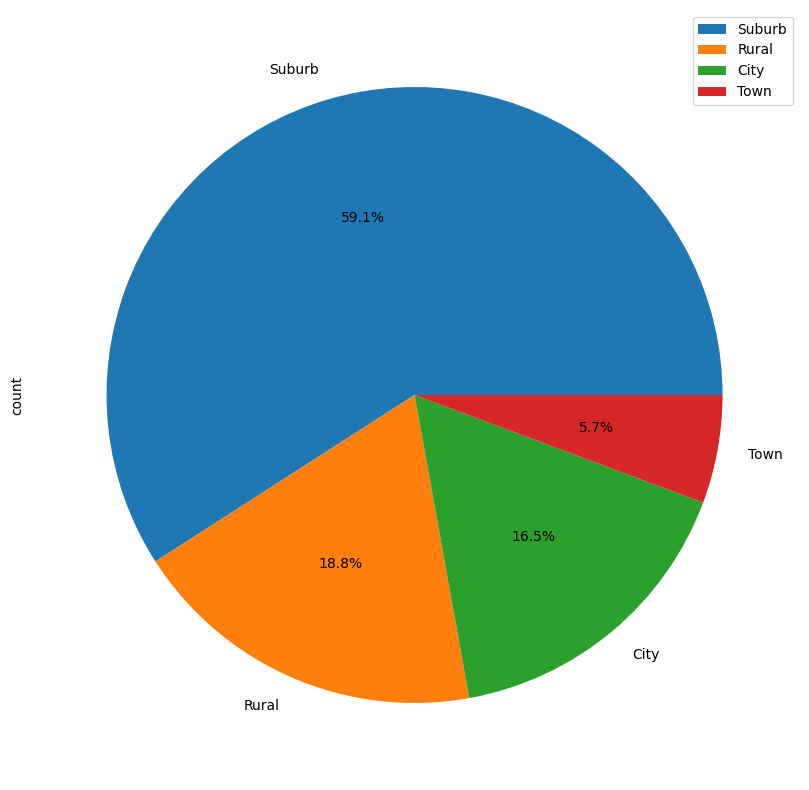

In [ ]:
districts_data["locale"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

Distribution of pct_black/hispanic

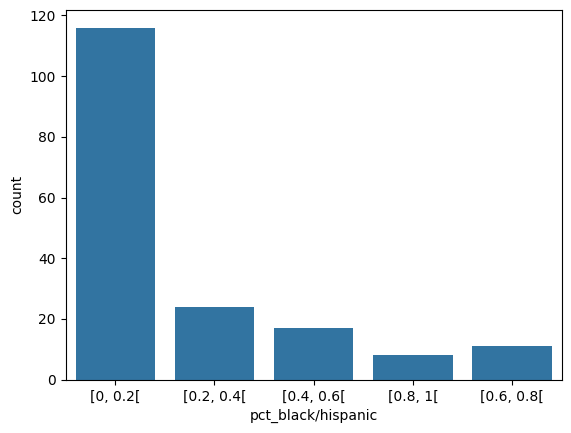

In [ ]:
sns.countplot(data= districts_data, x = "pct_black/hispanic")
plt.show()

pct_free/reduced

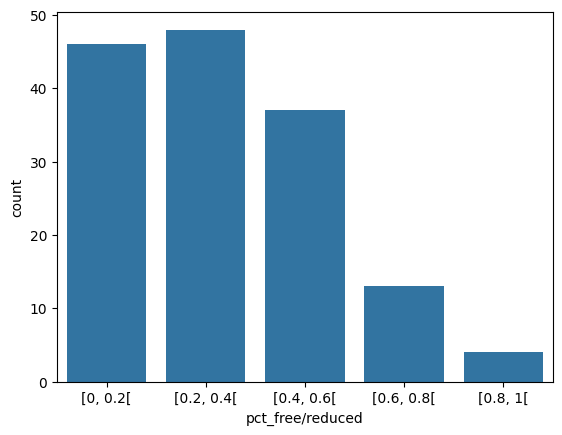

In [ ]:
sns.countplot(data= districts_data, x = "pct_free/reduced")
plt.show()

county_connections_ratio

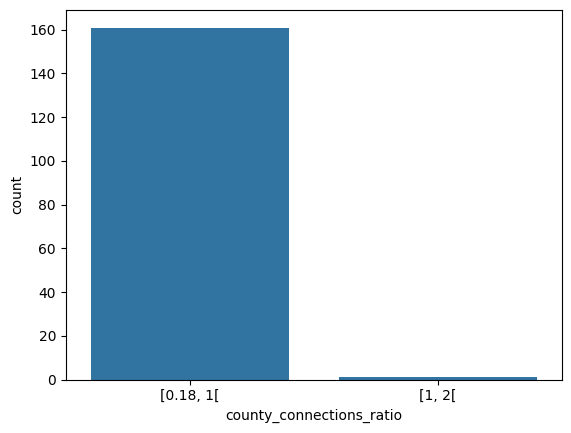

In [ ]:
sns.countplot(data= districts_data, x = "county_connections_ratio")
plt.show()

(array([ 0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0.0, 0, '0'),
  Text(5.0, 0, '5'),
  Text(10.0, 0, '10'),
  Text(15.0, 0, '15'),
  Text(20.0, 0, '20'),
  Text(25.0, 0, '25'),
  Text(30.0, 0, '30'),
  Text(35.0, 0, '35')])

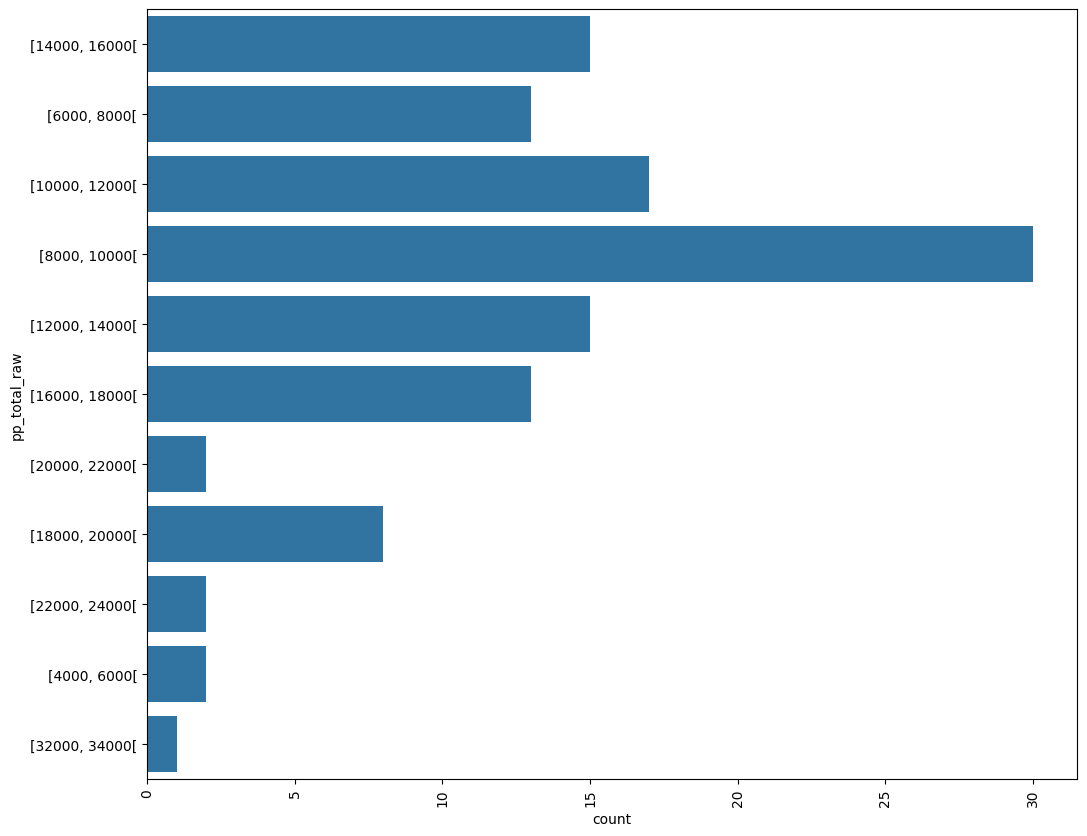

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(districts_data.pp_total_raw)
plt.xticks(rotation=90)

#Loading the Products data

In [ ]:
products_data = pd.read_csv("/content/products_info.csv")
products_data

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


Distribution of Sector(s) in the District Information Data

In [ ]:
ds = products_data['Sector(s)'].value_counts().reset_index()
ds.columns = [
    'Sector(s)',
    'percent'
]
ds['percent'] /= len(products_data)

fig = px.pie(
    ds,
    names='Sector(s)',
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Distribution of Sector(s) in the District Information Data:',
    width=700,
    height=500
)
fig.show()

Districts state wordcloud

(-0.5, 1439.5, 1079.5, -0.5)

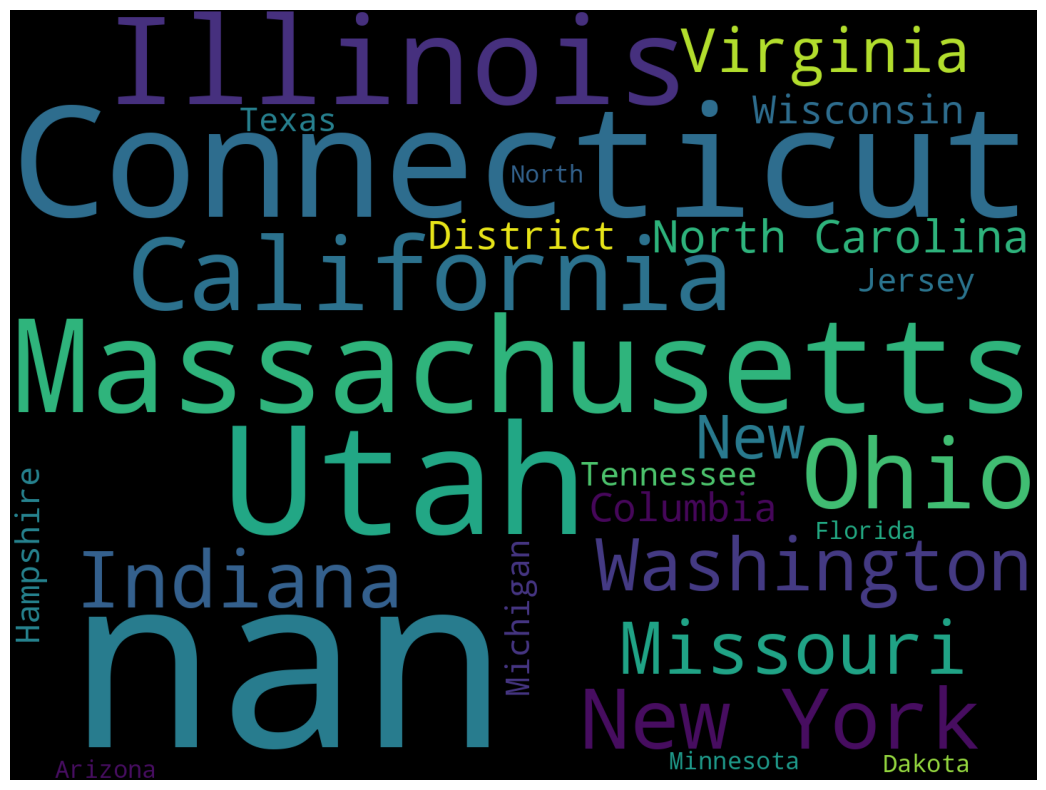

In [ ]:
cloud = WordCloud(width=1440, height=1080).generate(" ".join(districts_data['state'].astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

Occurrence of states in the District Information Data

In [ ]:
ds = districts_data['state'].value_counts().reset_index()
ds.columns = [
    'state',
    'percent'
]
ds['percent'] /= len(districts_data)

fig = px.pie(
    ds,
    names='state',
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Occurrence of states in the District Information Data:',
    width=700,
    height=500
)
fig.show()

Occurrence of Locale in the District Information Data

In [ ]:
ds = districts_data['locale'].value_counts().reset_index()
ds.columns = [
    'locale',
    'percent'
]
ds['percent'] /= len(districts_data)

fig = px.pie(
    ds,
    names='locale',
    values='percent',
    color_discrete_sequence=px.colors.sequential.Mint,
    title='Occurrence of Locale in the District Information Data:',
    width=700,
    height=500
)
fig.show()

In [36]:
CSV_files=pd.DataFrame()
address = glob.glob('/content/drive/MyDrive/learnplatform-covid19-impact-on-digital-learning/engagement_data/*.csv')
count=0
for i in address:
    with open(i, "rb") as data_of_files:
        data=pd.read_csv(data_of_files)
        CSV_files=pd.concat([CSV_files,data], axis=0)
        count=count+1
        if count==233:
            break
CSV_files

,time,lp_id,pct_access,engagement_index
0,2020-01-01,16406.0,0.01,1.29
1,2020-01-01,92993.0,0.01,1.59
2,2020-01-01,71370.0,0.01,0.06
3,2020-01-01,43491.0,0.01,0.37
4,2020-01-01,28504.0,0.02,1.16
...,...,...,...,...
98445,2020-12-31,56028.0,0.02,0.20
98446,2020-12-31,14124.0,0.02,0.99
98447,2020-12-31,98001.0,0.00,NaN
98448,2020-12-31,13496.0,0.12,6.51


Numeric features distribution

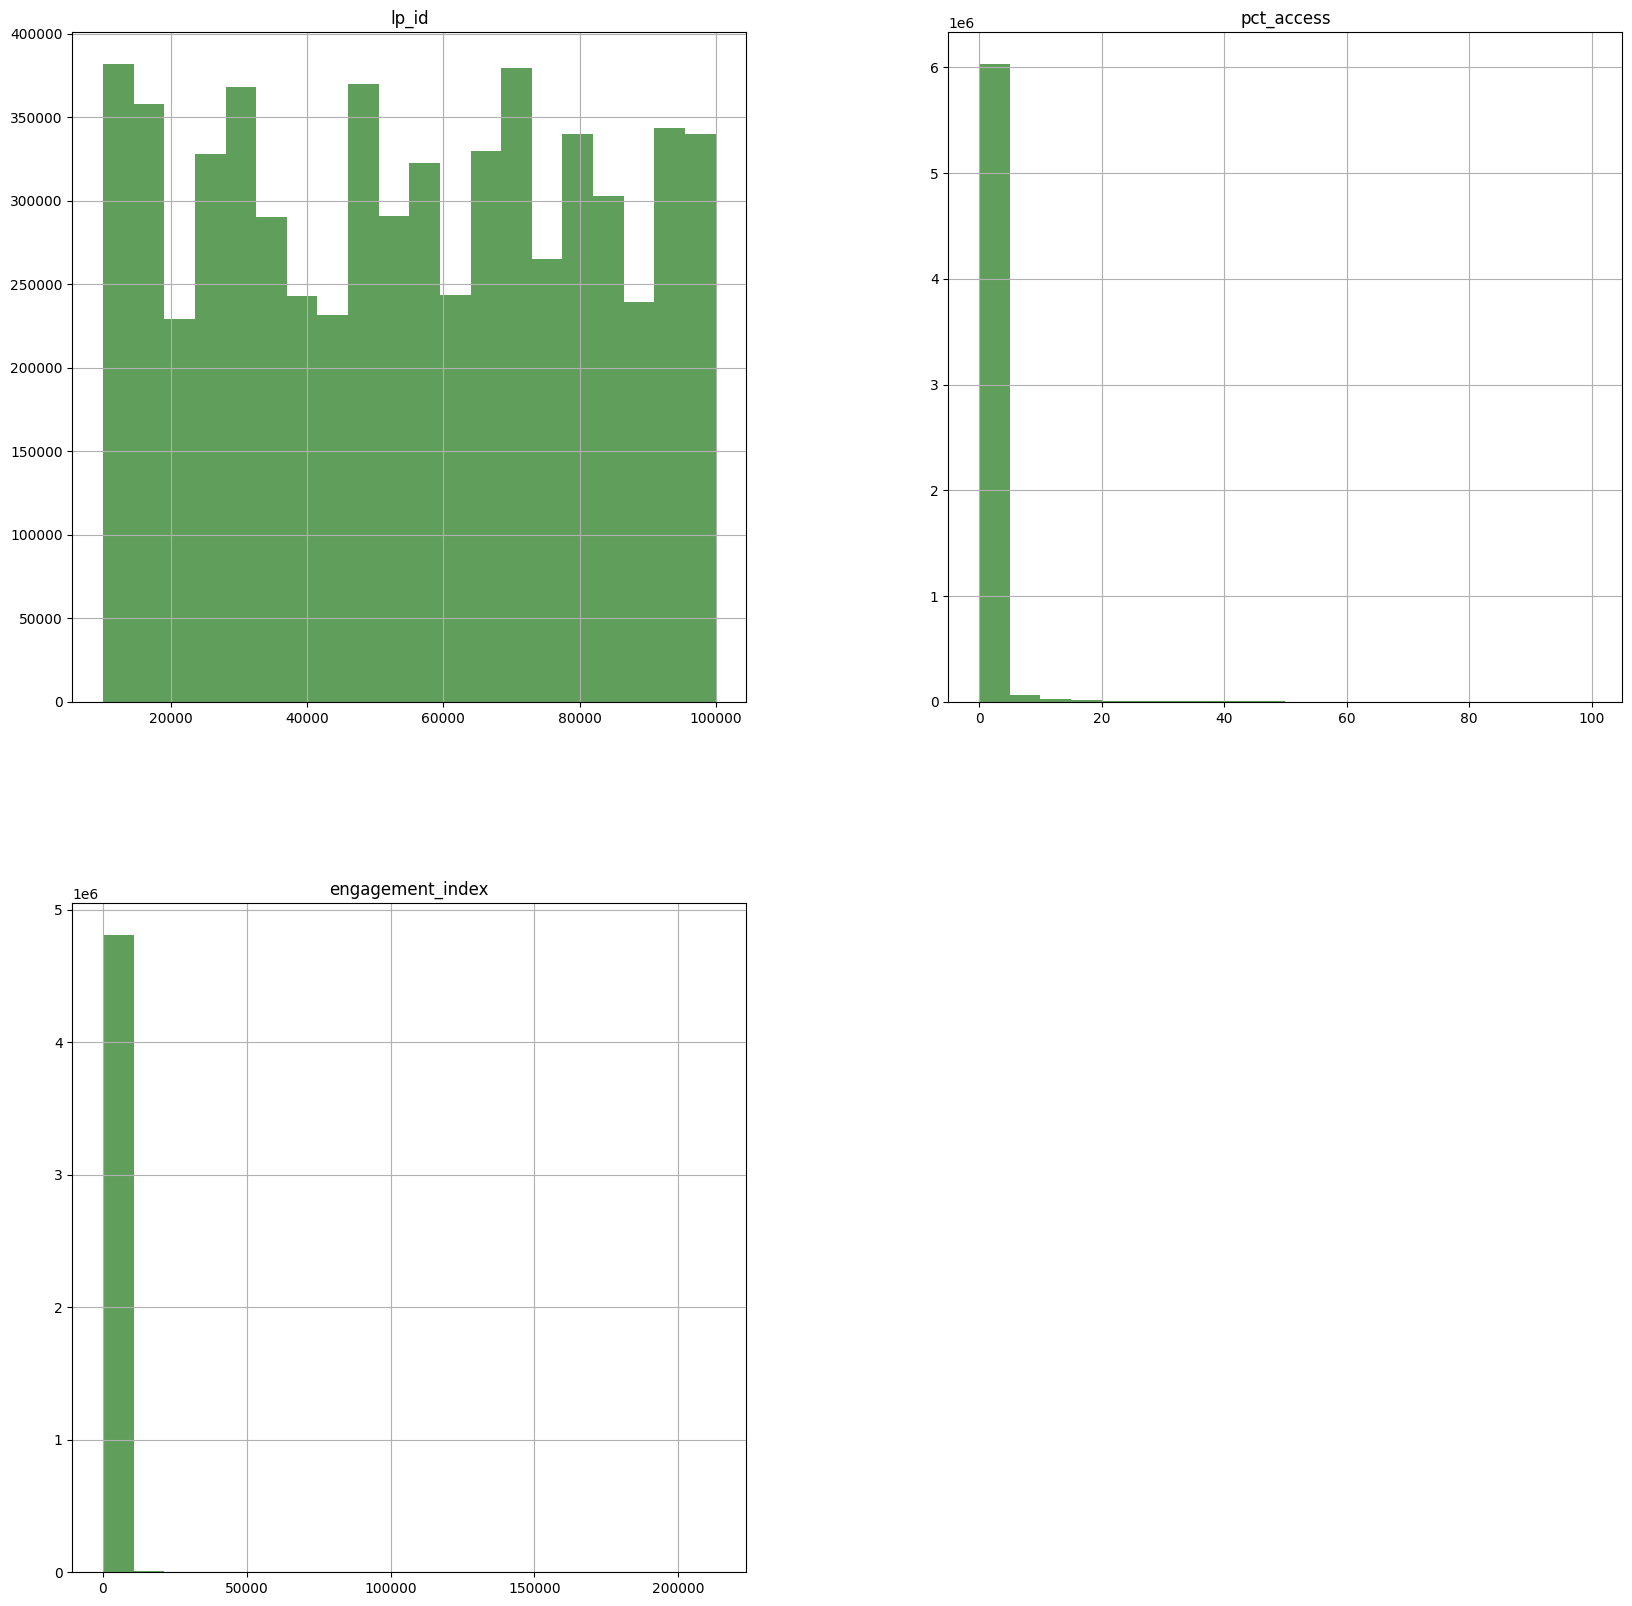

In [37]:
CSV_files.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

Bivariate Analysis

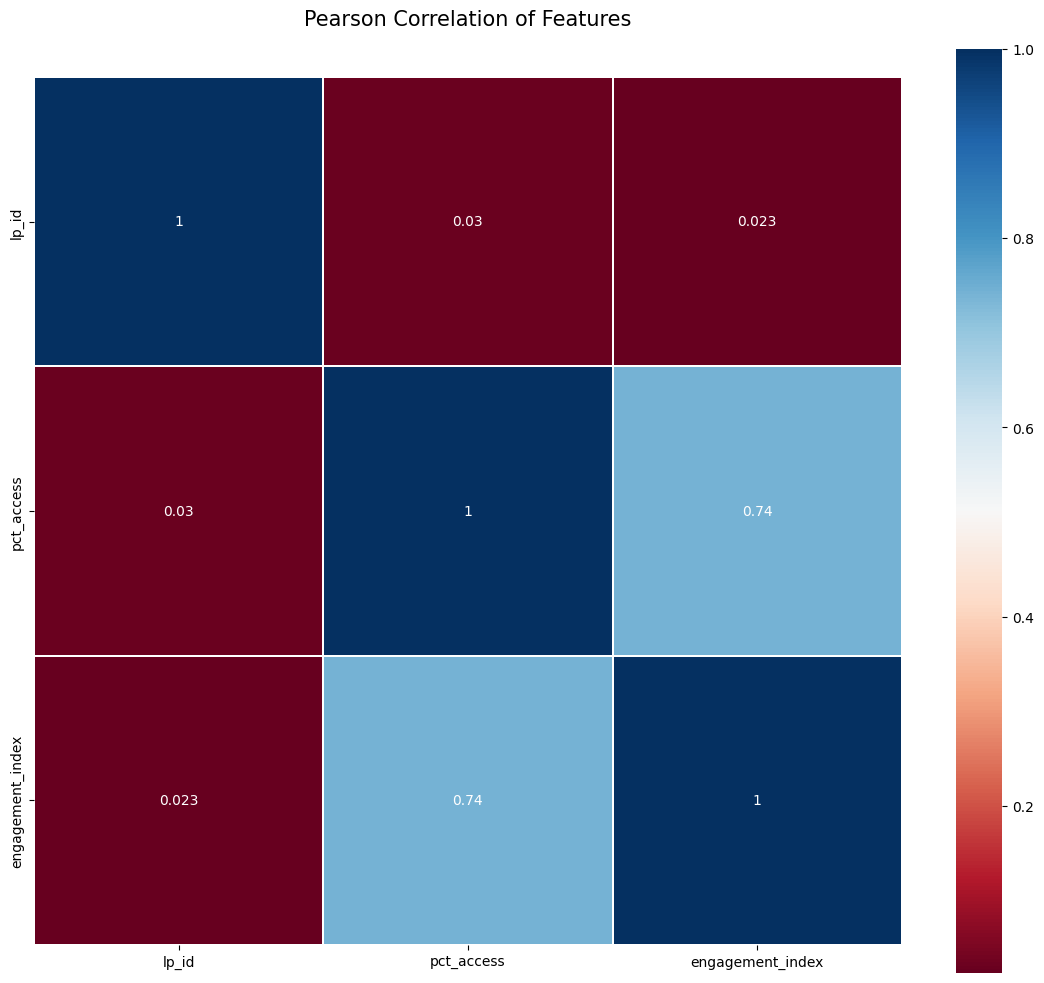

In [41]:
# Convert the 'time' column to datetime objects if it's not already
CSV_files['time'] = pd.to_datetime(CSV_files['time'])

# Extract numerical features for correlation analysis
numerical_features = CSV_files.select_dtypes(include=['number'])

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(numerical_features.corr(),linewidths=0.1,vmax=1.0,
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Missing value Treatment

In [42]:
CSV_files.isnull().sum()

time                      0
lp_id                    97
pct_access            10347
engagement_index    1363919
dtype: int64

lets calculate the missing values in each column

In [44]:
data_total = CSV_files.isnull().sum()
data_percent = ((CSV_files.isnull().sum()/CSV_files.shape[0])*100).round(2)
missing_data = pd.concat([data_total, data_percent],
                                axis=1,
                                keys=['Data_Total', 'Data_Percent %'],
                                sort = True)
missing_data.style.bar(color = ['gold', 'lightblue'])

,Data_Total,Data_Percent %
engagement_index,1363919,22.010000
lp_id,97,0.000000
pct_access,10347,0.170000
time,0,0.000000


Combining th data

In [45]:
print(products_data["LP ID"].nunique())
print(CSV_files["lp_id"].nunique())

372
7831


In [46]:
products_engagement_data = pd.merge(products_data, CSV_files, left_on='LP ID', right_on='lp_id')
products_engagement_data.head()

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,lp_id,pct_access,engagement_index
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-02,13117.0,0.09,4.47
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-03,13117.0,0.09,5.94
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-06,13117.0,0.10,5.39
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-07,13117.0,0.12,5.26
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-08,13117.0,0.10,4.53
